<a href="https://colab.research.google.com/github/Rosty21/Labs/blob/master/DL_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.5.0'

In [9]:
keras.__version__

'2.5.0'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
X_train_full.shape


(60000, 28, 28)

In [11]:
X_train_full.dtype

dtype('uint8')

In [12]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),  
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")                             
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7265 - accuracy: 0.7595 - val_loss: 0.5085 - val_accuracy: 0.8250
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4903 - accuracy: 0.8290 - val_loss: 0.4562 - val_accuracy: 0.8412
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4456 - accuracy: 0.8435 - val_loss: 0.4456 - val_accuracy: 0.8388
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4192 - accuracy: 0.8528 - val_loss: 0.4016 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3981 - accuracy: 0.8600 - val_loss: 0.3943 - val_accuracy: 0.8624
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3819 - accuracy: 0.8652 - val_loss: 0.3922 - val_accuracy: 0.8594
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3680 - accuracy: 0.8701 - val_loss: 0.3689 - val_accuracy:

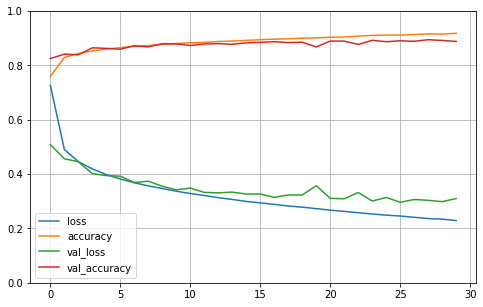

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()